<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Feature%20Selection/Comparison_of_F_test_and_mutual_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression, mutual_info_regression

## Introduction

We consider 3 features `p`, `q`, `r` distributed uniformly over [0, 1], the target depends on them as follows:

`y = p + sin(6 * pi * q) + 0.1 * N(0, 1)`, that is the third features is completely irrelevant.

The code below plots the dependency of y against individual features and normalized values of univariate F-tests statistics and mutual information.

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.



## Create features and targets

`np.random.rand(1000,3)`
Create an array of the given shape and populate it with random samples from a uniform distribution over `[0, 1)`.

`random.randn(d0, d1, ..., dn)`  Return a sample (or samples) from the “standard normal” distribution.



In [2]:
np.random.seed(42)

features = np.random.rand(1000,3)

df = pd.DataFrame(data=features, columns=['p','q','r'])


In [3]:
# y = p + sin(6 * pi * q) + 0.1 * N(0, 1)
target = df.p + np.sin(6 * np.pi * df.q) + 0.1 * np.random.randn(1000)
df['y'] = target
df.head()

,p,q,r,y
0,0.374540,0.950714,0.731994,-0.320496
1,0.598658,0.156019,0.155995,0.859725
2,0.058084,0.866176,0.601115,-0.453839
3,0.708073,0.020584,0.969910,0.949823
4,0.832443,0.212339,0.181825,0.195204


## Feature selection 

In [4]:
# f_statistic
f_statistic, p_values = f_regression(features, target)

# normalized f_stat
f_statistic /= f_statistic.max()

In [5]:
# mutal information
mi = mutual_info_regression(features, target)

# normalized mi score
mi /= mi.max()

## Visualization

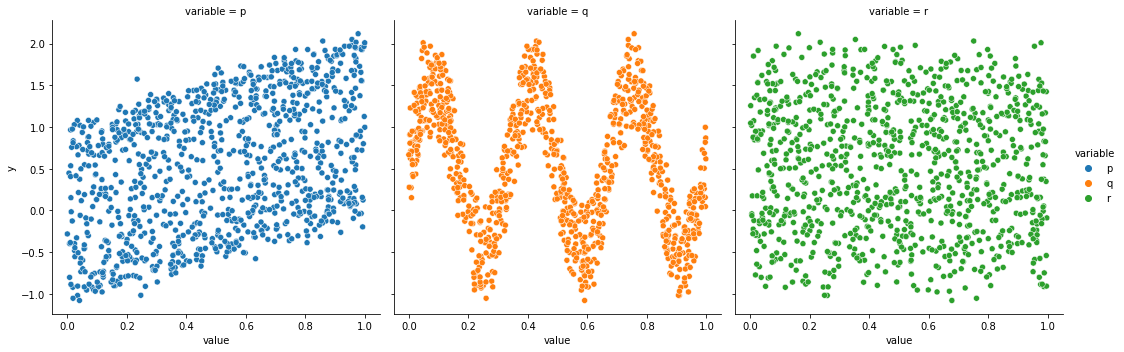

In [6]:
sns.relplot(x='value', y='y', data=pd.melt(df, ['y']), col='variable', hue='variable');

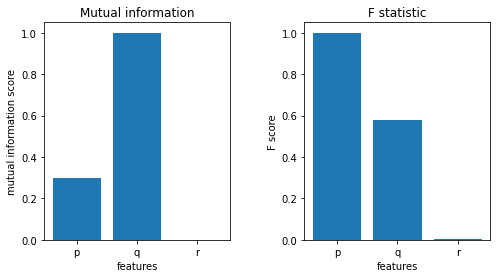

In [25]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.bar(['p', 'q', 'r'],mi)
plt.xlabel('features')
plt.ylabel('mutual information score')
plt.title('Mutual information');

plt.subplot(122)
plt.bar(['p', 'q', 'r'],f_statistic)
plt.xlabel('features')
plt.ylabel('F score')
plt.title('F statistic');

plt.subplots_adjust(wspace=0.4)

As F-test captures only linear dependency, it rates `p` as the most discriminative feature. On the other hand, mutual information can capture any kind of dependency between variables and it rates `q` as the most discriminative feature, which probably agrees better with our intuitive perception for this example. Both methods correctly marks `r` as irrelevant